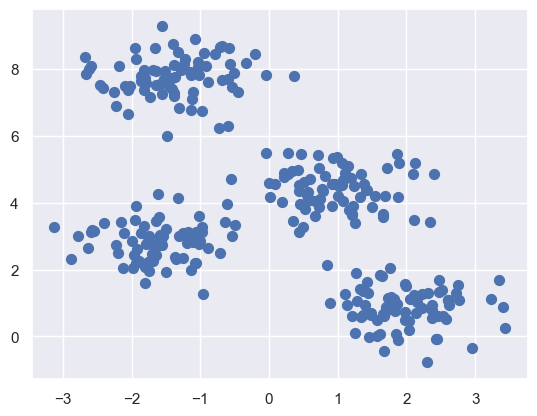

In [1]:
#importing libraries and forming clusters
import matplotlib.pyplot as plt
#importing libraries and forming clusters%matplotlib inline
import seaborn as sns;sns.set()
import numpy as np
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50);

In [2]:
#assign 4 clusters
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

        

In [3]:
y_kmeans

array([2, 3, 0, 3, 2, 2, 1, 0, 3, 3, 1, 3, 0, 3, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 1, 0, 0,
       1, 1, 3, 1, 3, 2, 1, 2, 3, 2, 2, 1, 3, 1, 3, 2, 3, 0, 3, 1, 1, 1,
       3, 2, 3, 1, 0, 1, 3, 1, 1, 3, 1, 0, 2, 3, 2, 0, 2, 2, 3, 0, 2, 0,
       3, 3, 0, 2, 3, 1, 1, 0, 2, 2, 0, 1, 3, 2, 3, 2, 0, 2, 2, 0, 3, 0,
       1, 1, 2, 3, 2, 0, 3, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 2, 3, 1, 1, 3, 0, 3, 3, 1, 0, 1, 0, 1, 3, 0, 3, 3, 3, 0, 3, 0,
       2, 1, 3, 1, 2, 0, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 3, 2, 0, 1, 3,
       2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 3, 0, 1, 2, 1, 0, 3, 1, 3, 0, 3, 0, 1, 0, 0, 3, 1, 1, 2, 2, 0,
       3, 2, 2, 1, 2, 1, 0, 3, 3, 0, 0, 3, 0, 2, 1, 0, 2, 1, 3, 1, 2, 0,
       2, 3, 3, 3, 3, 1, 1, 3, 0, 1, 2, 0, 1, 1, 1, 2, 2, 3, 0, 0, 1, 2,
       3, 1, 0, 3, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 3, 3, 2, 2, 0, 2, 2, 2,
       3, 1, 3, 0, 2, 2, 3, 3, 3, 2, 2, 0, 3, 1], d

In [9]:
#import libraries
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    #1.randomly choose clusters
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    while True:
        #2a.assign labels based on closest center
        labels=pairwise_distances_argmin(X,centers)
        #2b.finding new centers from means of points
        new_c=np.array([X[labels==i].mean(0)
                for i in range(n_clusters)])
        #2c.check for convergence
        if np.all(centers==new_c):
            break
            centers=new_c
    return centers,labels
centers,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='virdis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);

NameError: name 'X' is not defined

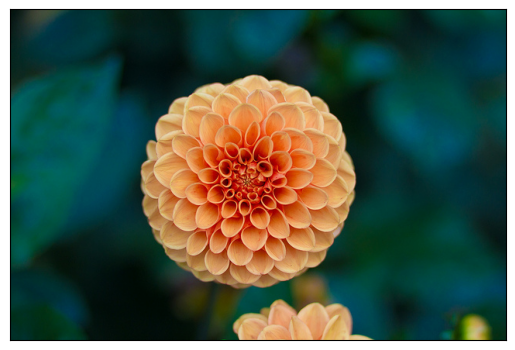

In [5]:
#kmeans for color compression
#importing libraries and image
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
img=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(img)

In [6]:
img.shape

(427, 640, 3)

In [8]:
img

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [10]:
#normalizing to 0....1 scale
data=img/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [11]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_pixels(data,title,colors=None,n=10000):
    if colors is None:
     colors=data
    #choosing a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:n]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20)

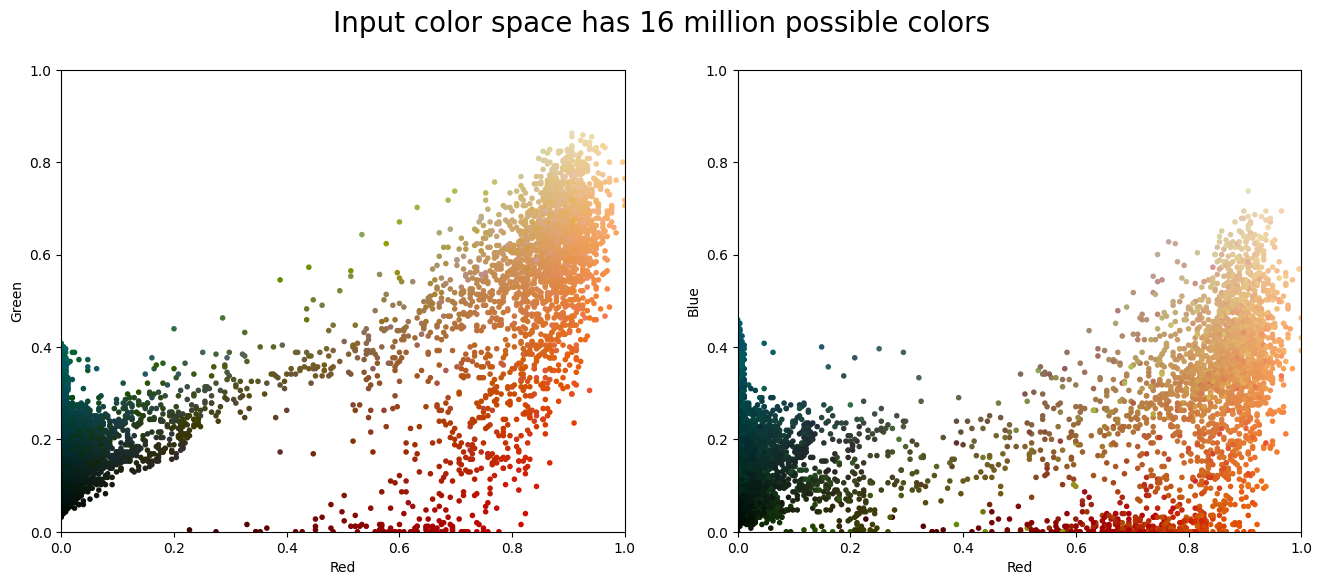

In [25]:
plot_pixels(data,title='Input color space has 16 million possible colors')

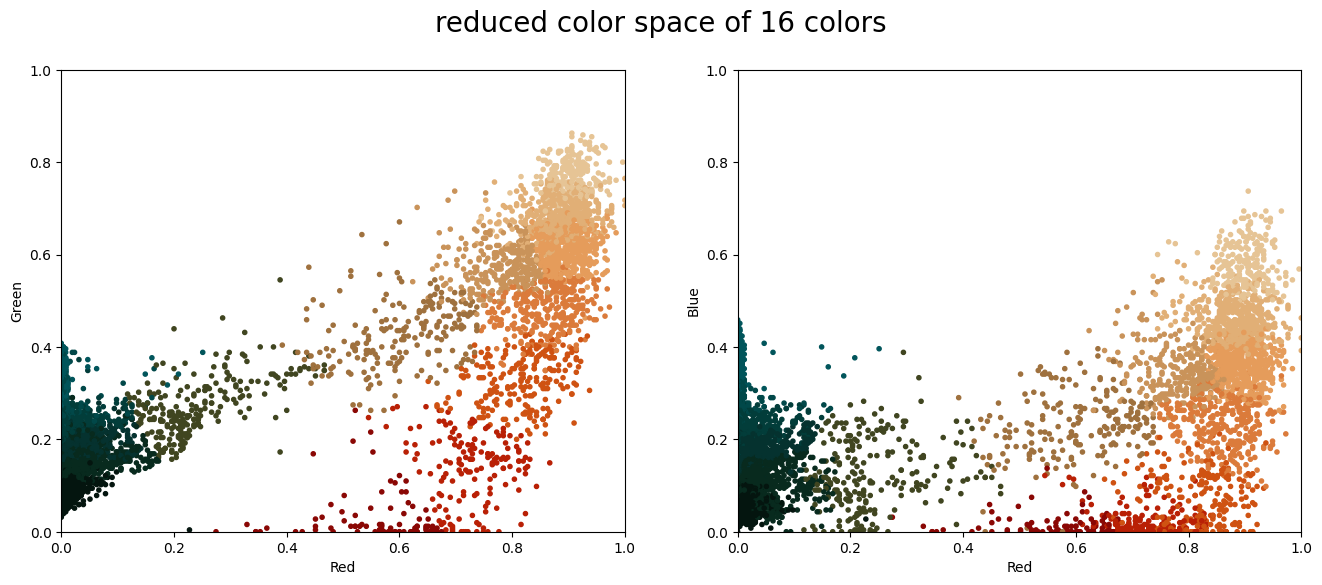

In [28]:
#imposing k means in 16 minibatches
#fixing the numpy issues
import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_c=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors=new_c,title="reduced color space of 16 colors")


In [ ]:
#applying new colors to the original image
